In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

C:\Users\victo\AppData\Local\Temp\ipykernel_17388\2624102940.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# connect and acquire a cursor
# if the .db file does not exist, it will be created
conn = sqlite3.connect("test.db")
cursor = conn.cursor()

In [3]:
# create a table
cursor.execute("""CREATE TABLE Course(
                    cid tinyint(4) NOT NULL,
                    course_name TEXT NOT NULL,
                    course_code varchar(10) NOT NULL,
                    credits tinyint(4),
                    PRIMARY KEY (cid)
                    );
               """)

# insert a turple/row
cursor.execute("""INSERT INTO Course VALUES (1, 'Intro to Computer Science', 'CS1310', 4);""")

OperationalError: table Course already exists

In [ ]:
# querying data in table Course
query = """SELECT *
           FROM Course;
        """
cursor.execute(query)
print(cursor.fetchall())

[]


In [ ]:
# insert multiple tuples
courses = [(2, 'Data Structure', 'CS3320', 4),
           (3, 'Discrete Mathematics', 'MATH2410', 3),
           (4, 'Database', 'CS1310', 3),
           (5, 'Physics', 'PHY100', 6)]
cursor.executemany("INSERT INTO Course VALUES (?,?,?,?)", courses)

In [ ]:
# querying data in table Course
query = """SELECT *
           FROM Course;
        """
cursor.execute(query)
print(cursor.fetchall())

for course in cursor.fetchall():
    print(course)

[(2, 'Data Structure', 'CS3320', 4), (3, 'Discrete Mathematics', 'MATH2410', 3), (4, 'Database', 'CS1310', 3), (5, 'Physics', 'PHY100', 6)]


In [ ]:
cursor.execute(query)
for course in cursor.fetchall():
    print(course)

(2, 'Data Structure', 'CS3320', 4)
(3, 'Discrete Mathematics', 'MATH2410', 3)
(4, 'Database', 'CS1310', 3)
(5, 'Physics', 'PHY100', 6)


In [ ]:
query = """SELECT course_name, credits
           FROM Course
           WHERE credits >= 4;
        """
cursor.execute(query)
for course in cursor.fetchall():
    print(course)

('Data Structure', 4)
('Physics', 6)


In [ ]:
# deleting all tables
def delete_all_tables(conn):
    TABLE_PARAMETER = "{TABLE_PARAMETER}"
    cur = conn.cursor()
    cur.execute("SELECT name FROM sqlite_schema WHERE type='table';")
    tables = cur.fetchall()
    for table, in tables:
        sql = f"DROP TABLE {TABLE_PARAMETER};".replace(TABLE_PARAMETER, table)
        cur.execute(sql)  
    cur.close()

delete_all_tables(conn)

In [ ]:
conn.close()

### Exploring the IMDB dataset with Pandas

In [9]:
# Please modify the path to the target .db file
df_file = "C:\\Users\\victo\\Desktop\\movie_imdb_cmu.db"


conn = sqlite3.connect(df_file)
c = conn.cursor()

# a function for overviewing the schema
def table_info(c, conn):
    '''
    prints out all of the columns of every table in db
    c : cursor object
    conn : database connection object
    '''
    tables = c.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
    for table_name in tables:
        table_name = table_name[0] # tables is a list of single item tuples
        table = pd.read_sql_query("SELECT * from {} LIMIT 0".format(table_name), conn)
        print(table_name)
        for col in table.columns:
            print('\t' + col)
        print()

table_info(c, conn)

akas
	title_id
	title
	region
	language
	types
	attributes
	is_original_title

crew
	title_id
	person_id
	category
	job
	characters

episodes
	episode_title_id
	show_title_id
	season_number
	episode_number

people
	person_id
	name
	born
	died

ratings
	title_id
	rating
	votes

titles
	title_id
	type
	primary_title
	original_title
	is_adult
	premiered
	ended
	runtime_minutes
	genres



In [10]:
query = """SELECT *
           FROM titles
           WHERE runtime_minutes >= 90
           LIMIT 20;
        """

df = pd.read_sql(query, conn)

In [11]:
df

,title_id,type,primary_title,original_title,is_adult,premiered,ended,runtime_minutes,genres
0,tt0002625,movie,Ana Kadova,Ana Kadova,0,1913,None,92,\N
1,tt0002898,movie,"Germinal; or, The Toll of Labor",Germinal,0,1913,None,150,Drama
2,tt0003102,movie,Love Everlasting,Ma l'amor mio non muore...,0,1914,None,90,Drama
3,tt0003165,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0,1913,None,90,"Crime,Drama,Mystery"
4,tt0003241,movie,One Hundred Years of Mormonism,One Hundred Years of Mormonism,0,1913,None,90,"Drama,History"
5,tt0003675,movie,The Beloved Adventurer,The Beloved Adventurer,0,1914,None,450,Adventure
6,tt0003883,movie,L'enfant de Paris,L'enfant de Paris,0,1913,None,124,"Crime,Drama"
7,tt0004483,movie,The Port of Missing Men,The Port of Missing Men,0,1914,None,139,Drama
8,tt0004525,movie,The Reign of Terror,Le chevalier de Maison-Rouge,0,1914,None,109,"Drama,History"
9,tt0004594,movie,El signo de la tribu,El signo de la tribu,0,1914,None,219,\N


In [12]:
df.describe()

,is_adult,premiered,runtime_minutes
count,20.0,20.000000,20.000000
mean,0.0,1914.650000,174.800000
std,0.0,1.460894,114.219825
min,0.0,1913.000000,90.000000
25%,0.0,1913.750000,95.750000
50%,0.0,1914.000000,116.500000
75%,0.0,1916.000000,226.750000
max,0.0,1918.000000,450.000000


In [ ]:
query = """SELECT t.title_id, t.type, t.primary_title, t.is_adult, t.premiered, t.runtime_minutes, t.genres, r.rating, r.votes
           FROM titles AS t
            LEFT JOIN ratings as r
               ON r.title_id = t.title_id
           WHERE runtime_minutes >= 90
           ORDER BY r.rating DESC
        """

df = pd.read_sql(query, conn)
df

,title_id,type,primary_title,is_adult,premiered,runtime_minutes,genres,rating,votes
0,tt0132596,tvMovie,Verkündigung,0,1963.0,100,\N,10.0,12.0
1,tt0343717,tvMovie,Gideon,0,1966.0,110,\N,10.0,15.0
2,tt0448376,tvSpecial,Ein Berliner in Hamburg,0,1961.0,105,Music,10.0,17.0
3,tt0473904,video,Eat My Ass,1,2005.0,150,Adult,10.0,10.0
4,tt1085701,tvMovie,Die gute Sieben,0,1959.0,90,Comedy,10.0,24.0
...,...,...,...,...,...,...,...,...,...
50764,tt9914928,movie,Noblesse Oblige,0,NaN,105,Drama,NaN,NaN
50765,tt9915090,tvEpisode,Énergies et nucléaire,0,1981.0,130,"Documentary,News,Talk-Show",NaN,NaN
50766,tt9915152,video,Legendary Idol Volume 20: The Classic Adult Vi...,1,2007.0,110,Adult,NaN,NaN
50767,tt9916058,movie,"Cali: ayer, hoy y mañana",0,1995.0,250,Documentary,NaN,NaN


In [13]:
df_notna = df.dropna(subset=["rating"])
print(df_notna.shape)

KeyError: ['rating']

In [ ]:
file_csv = ".../title_rating.csv"
df_notna.to_csv(file_csv, index=False)

In [ ]:
df_csv = pd.read_csv(file_csv)
df_csv

,title_id,type,primary_title,is_adult,premiered,runtime_minutes,genres,rating,votes
0,tt0132596,tvMovie,Verkündigung,0,1963.0,100,\N,10.0,12.0
1,tt0343717,tvMovie,Gideon,0,1966.0,110,\N,10.0,15.0
2,tt0448376,tvSpecial,Ein Berliner in Hamburg,0,1961.0,105,Music,10.0,17.0
3,tt0473904,video,Eat My Ass,1,2005.0,150,Adult,10.0,10.0
4,tt1085701,tvMovie,Die gute Sieben,0,1959.0,90,Comedy,10.0,24.0
...,...,...,...,...,...,...,...,...,...
29267,tt5311054,movie,Browncoats: Independence War,0,2015.0,98,"Action,Sci-Fi,War",1.1,727.0
29268,tt10642850,tvSpecial,15 Temmuz destani,0,2019.0,129,News,1.0,190.0
29269,tt2124890,movie,Ramo Trip,0,2012.0,119,Documentary,1.0,465.0
29270,tt6254572,movie,Birth Control: Is It Up to Us?,0,2016.0,117,Documentary,1.0,7.0


Text(0, 0.5, 'Counts')

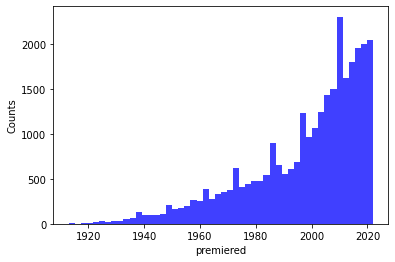

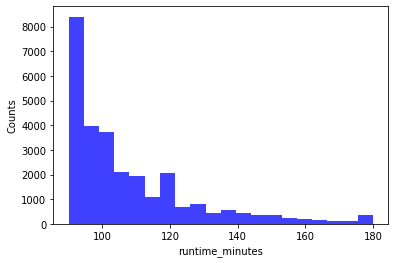

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
n, bins, patches = plt.hist(df_csv["premiered"], bins = 50, facecolor='blue', alpha=0.75, label="all")
plt.xlabel("premiered")
plt.ylabel("Counts")


plt.figure()
n, bins, patches = plt.hist(df_csv[df_csv["runtime_minutes"]<= 180]["runtime_minutes"], bins = 20, facecolor='blue', alpha=0.75, label="all")
plt.xlabel("runtime_minutes")
plt.ylabel("Counts")

In [ ]:
df_csv["rating"].unique()

array([10. ,  9.9,  9.8,  9.7,  9.6,  9.5,  9.4,  9.3,  9.2,  9.1,  9. ,
        8.9,  8.8,  8.7,  8.6,  8.5,  8.4,  8.3,  8.2,  8.1,  8. ,  7.9,
        7.8,  7.7,  7.6,  7.5,  7.4,  7.3,  7.2,  7.1,  7. ,  6.9,  6.8,
        6.7,  6.6,  6.5,  6.4,  6.3,  6.2,  6.1,  6. ,  5.9,  5.8,  5.7,
        5.6,  5.5,  5.4,  5.3,  5.2,  5.1,  5. ,  4.9,  4.8,  4.7,  4.6,
        4.5,  4.4,  4.3,  4.2,  4.1,  4. ,  3.9,  3.8,  3.7,  3.6,  3.5,
        3.4,  3.3,  3.2,  3.1,  3. ,  2.9,  2.8,  2.7,  2.6,  2.5,  2.4,
        2.3,  2.2,  2.1,  2. ,  1.9,  1.8,  1.7,  1.6,  1.5,  1.4,  1.3,
        1.2,  1.1,  1. ])

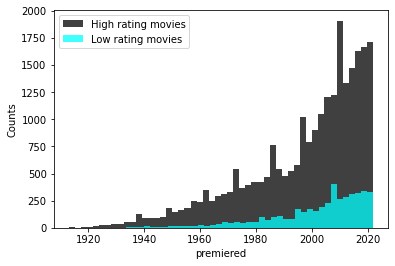

In [ ]:
plt.figure()
n, bins, patches = plt.hist(df_csv[df_csv["rating"]>=5]["premiered"], bins = 50, facecolor='k', alpha=0.75, label="High rating movies")
n, bins, patches = plt.hist(df_csv[df_csv["rating"]<5]["premiered"], bins = 50, facecolor='cyan', alpha=0.75, label="Low rating movies")
plt.xlabel("premiered")
plt.ylabel("Counts")
plt.legend()

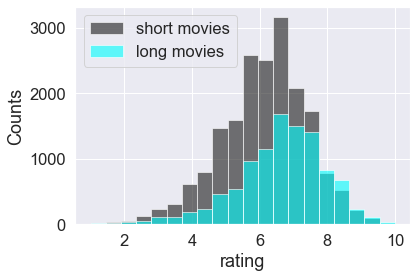

In [ ]:
plt.figure()
n, bins, patches = plt.hist(df_csv[df_csv["runtime_minutes"]<110]["rating"], bins = 20, facecolor='k', alpha=0.6, label="short movies")
n, bins, patches = plt.hist(df_csv[df_csv["runtime_minutes"]>=110]["rating"], bins = 20, facecolor='cyan', alpha=0.6, label="long movies")
plt.xlabel("rating")
plt.ylabel("Counts")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


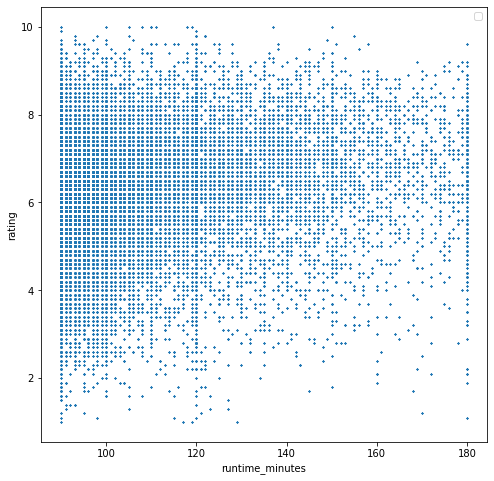

In [ ]:
xx, yy = df_csv[df_csv["runtime_minutes"]<=180]["runtime_minutes"], df_csv[df_csv["runtime_minutes"]<=180]["rating"]

plt.figure(figsize=(8, 8))
plt.scatter(xx, yy, s=2, marker="x")
plt.xlabel("runtime_minutes")
plt.ylabel("rating")
plt.legend()

<AxesSubplot:xlabel='runtime_minutes', ylabel='rating'>

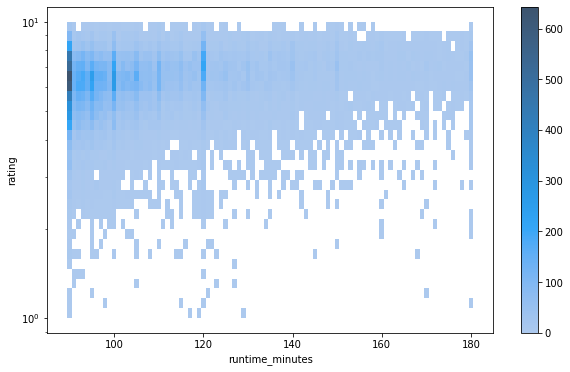

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(
    df_csv[df_csv["runtime_minutes"]<=180], x="runtime_minutes", y="rating",
    bins=30, discrete=(True, False), log_scale=(False, True),
    cbar=True
)

<AxesSubplot:xlabel='rating', ylabel='Count'>

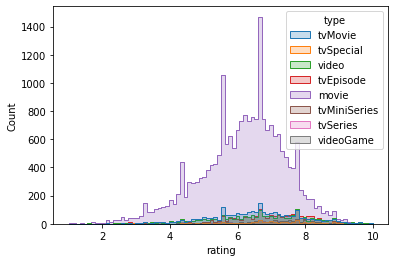

In [ ]:
sns.histplot(df_csv, x="rating", hue="type", element="step")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'tvMovie'),
  Text(1, 0, 'tvSpecial'),
  Text(2, 0, 'video'),
  Text(3, 0, 'tvEpisode'),
  Text(4, 0, 'movie'),
  Text(5, 0, 'tvMiniSeries'),
  Text(6, 0, 'tvSeries'),
  Text(7, 0, 'videoGame')])

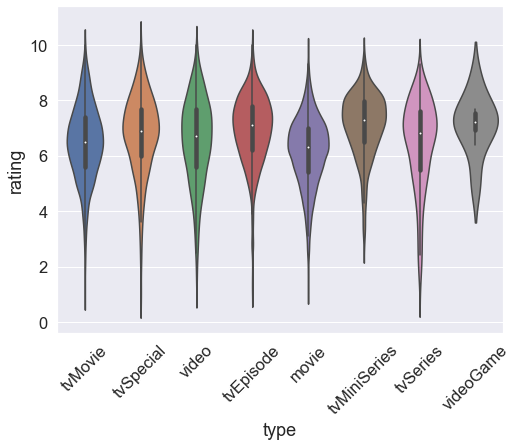

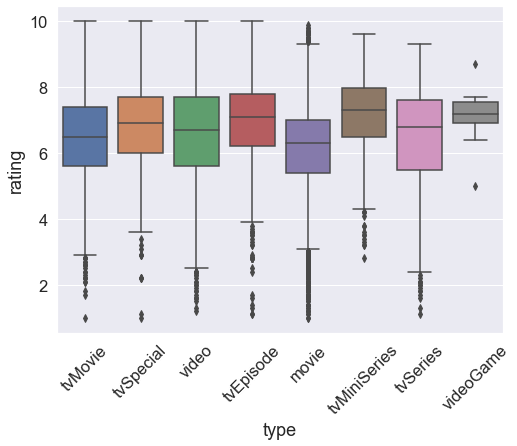

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)
sns.violinplot(data=df_csv, x="type", y="rating")
plt.xticks(rotation=45)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_csv, x="type", y="rating")
plt.xticks(rotation=45)

In [ ]:
list(df_csv.columns)

['title_id',
 'type',
 'primary_title',
 'is_adult',
 'premiered',
 'runtime_minutes',
 'genres',
 'rating',
 'votes']

In [ ]:
var_x = ['premiered', 'is_adult', 'runtime_minutes', 'votes']
var_y = 'rating'


df_reg = df_csv.dropna(subset=var_x)
print(df_csv.shape, df_reg.shape)

(29272, 9) (29270, 9)


Coefficients:  [-2.39366669e-03  2.20332709e-01  7.06465659e-05  2.51029140e-06]
Variance score: 0.0066420827257935855
mean_absolute_error: 1.0352227105695464
mean_squared_error score: 1.7437865731429871


<Figure size 720x720 with 0 Axes>

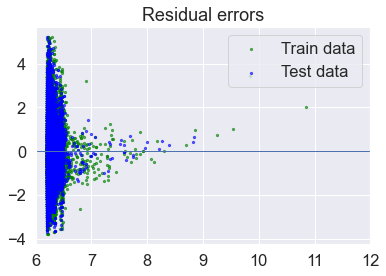

<Figure size 720x720 with 0 Axes>

In [ ]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_reg[var_x], df_reg[var_y], test_size=0.3,
                                                    random_state=1)

reg = linear_model.LinearRegression()


# train the model using the training sets
reg.fit(X_train, y_train)
  

print('Coefficients: ', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test)))
print('mean_absolute_error: {}'.format(mean_absolute_error(reg.predict(X_test), y_test)))
print('mean_squared_error score: {}'.format(mean_squared_error(reg.predict(X_test), y_test)))


## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 5, label = 'Train data', alpha=0.6)
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 5, label = 'Test data', alpha=0.6)

plt.xlim(6, 12)
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 1)
  
plt.legend(loc = 'upper right')
  
plt.title("Residual errors")
plt.figure(figsize=(10, 10))
